In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\luizc\\OneDrive\\Área de Trabalho\\Facul_Eng\\df_surf.csv') 


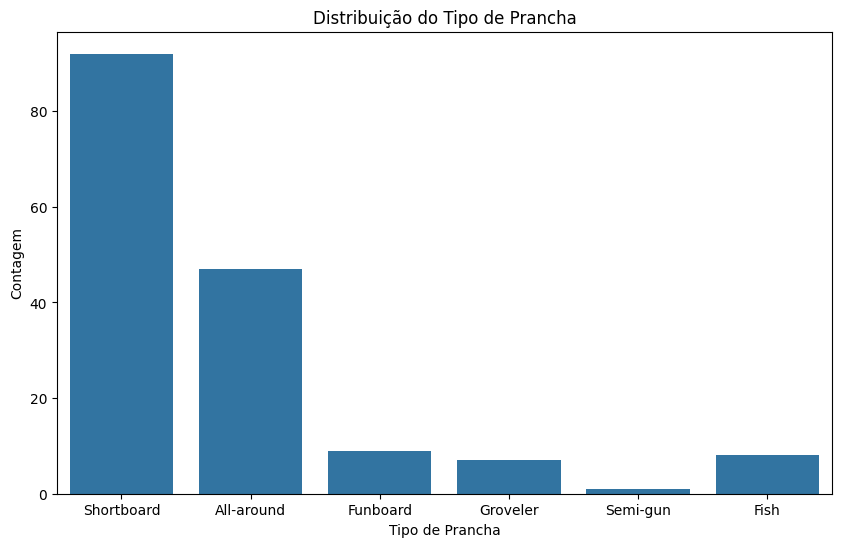

In [8]:
# Distribuição do Tipo de Prancha
plt.figure(figsize=(10, 6))
sns.countplot(x='board_type', data=df)
plt.title('Distribuição do Tipo de Prancha')
plt.xlabel('Tipo de Prancha')
plt.ylabel('Contagem')
plt.show()

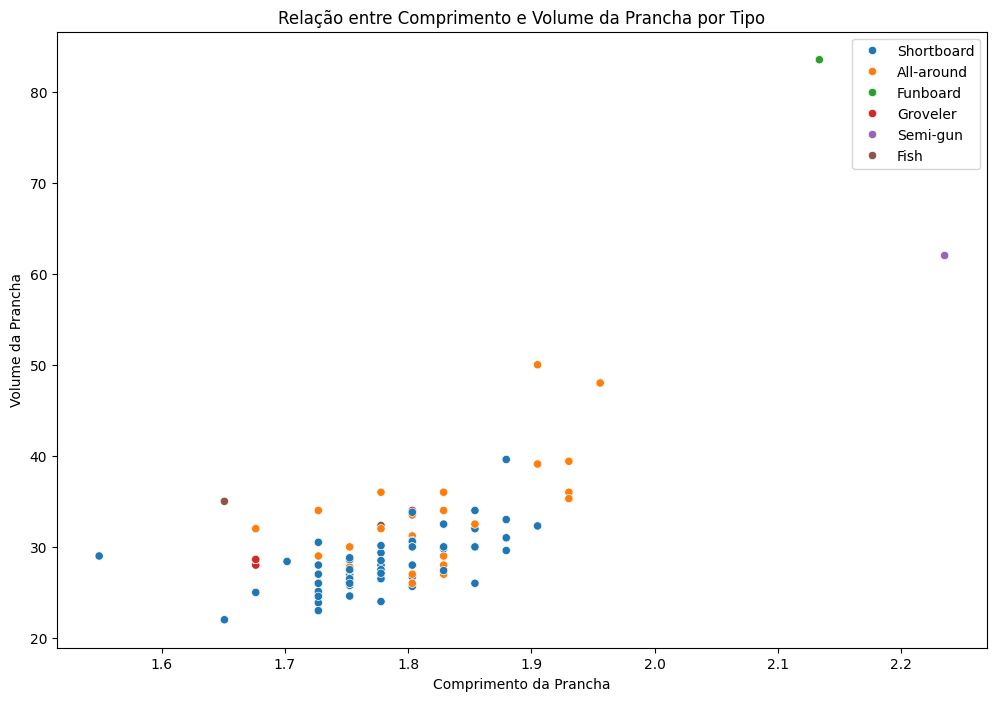

In [9]:
# Relação entre Variáveis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='board_length', y='board_volume', hue='board_type', data=df)
plt.title('Relação entre Comprimento e Volume da Prancha por Tipo')
plt.xlabel('Comprimento da Prancha')
plt.ylabel('Volume da Prancha')
plt.legend()
plt.show()

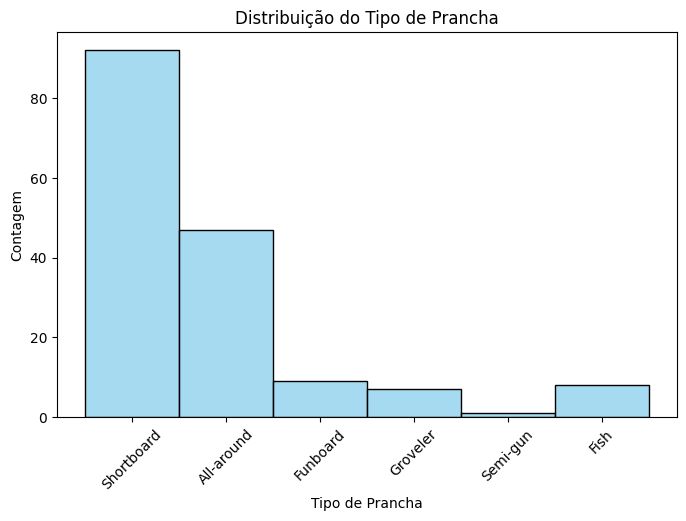

In [23]:
# visualizando a distribuição do tipo de prancha 
plt.figure(figsize=(8, 5))
sns.histplot(df['board_type'], color='skyblue', bins=20)
plt.title('Distribuição do Tipo de Prancha')
plt.xlabel('Tipo de Prancha')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # rotação dos rótulos no eixo x para melhor clareza
plt.show()


C:\Users\luizc\AppData\Local\Temp\ipykernel_25060\4232333733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surfer_experience', y='board_type', data=df, palette='viridis')


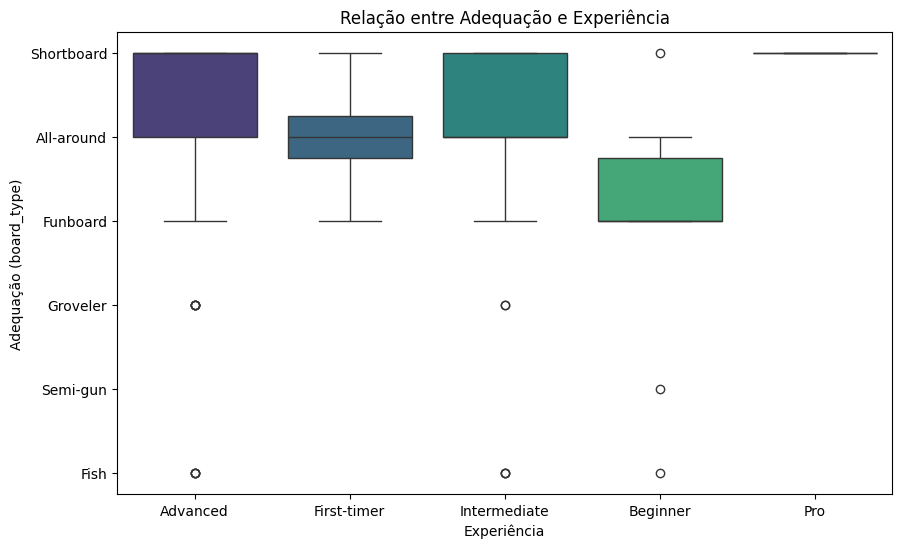

In [28]:
# Relação entre Adequação e Experiência
plt.figure(figsize=(10, 6))
sns.boxplot(x='surfer_experience', y='board_type', data=df, palette='viridis')
plt.title('Relação entre Adequação e Experiência')
plt.xlabel('Experiência')
plt.ylabel('Adequação (board_type)')
plt.show()


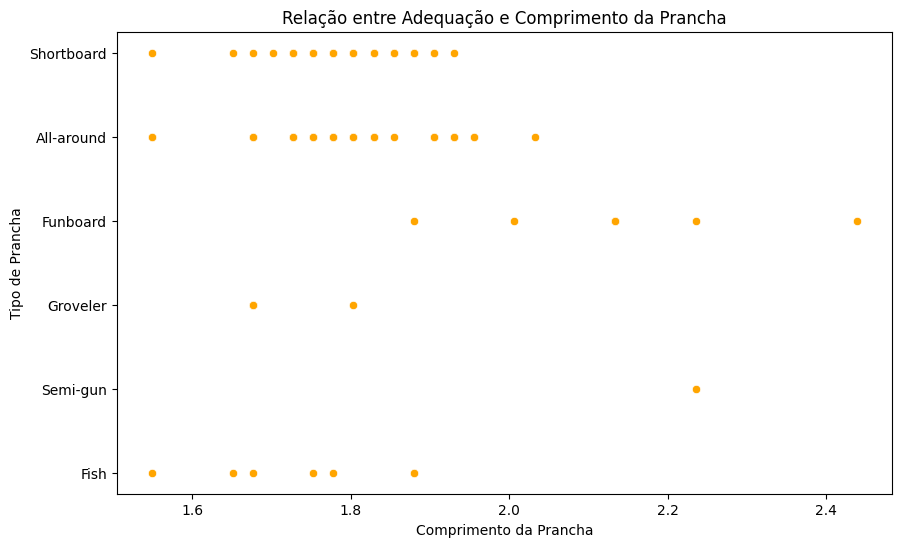

c:\Users\luizc\OneDrive\Documentos\workspace\cienciadados\ProgramaTeste


In [83]:
# Relação entre Adequação e Comprimento da Prancha
plt.figure(figsize=(10, 6))
sns.scatterplot(x='board_length', y='board_type', data=df, color='orange')
plt.title('Relação entre Adequação e Comprimento da Prancha')
plt.xlabel('Comprimento da Prancha')
plt.ylabel('Tipo de Prancha')
plt.show()



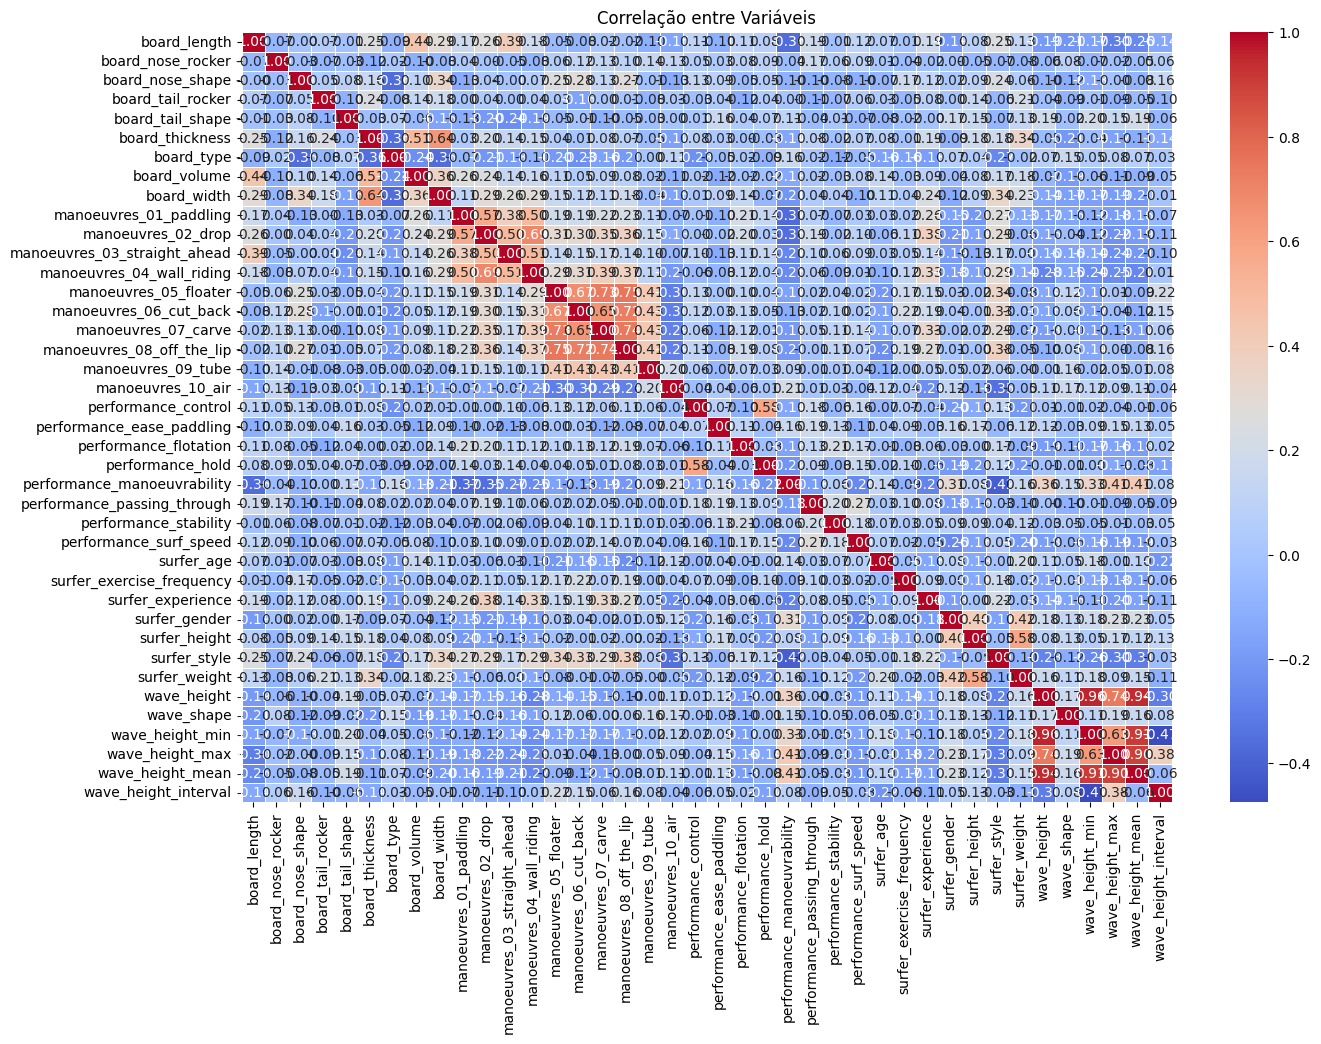

In [39]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


df_preprocessed = df.copy()


df_preprocessed = df_preprocessed.dropna(axis=1, how='all')

numeric_cols = df_preprocessed.select_dtypes(include='number').columns
imputer_numeric = SimpleImputer(strategy='mean')
df_preprocessed[numeric_cols] = imputer_numeric.fit_transform(df_preprocessed[numeric_cols])


categorical_cols = df_preprocessed.select_dtypes(include='object').columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_preprocessed[categorical_cols] = imputer_categorical.fit_transform(df_preprocessed[categorical_cols])


label_encoder = LabelEncoder()
df_preprocessed[categorical_cols] = df_preprocessed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

plt.figure(figsize=(15, 10))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlação entre Variáveis')
plt.show()


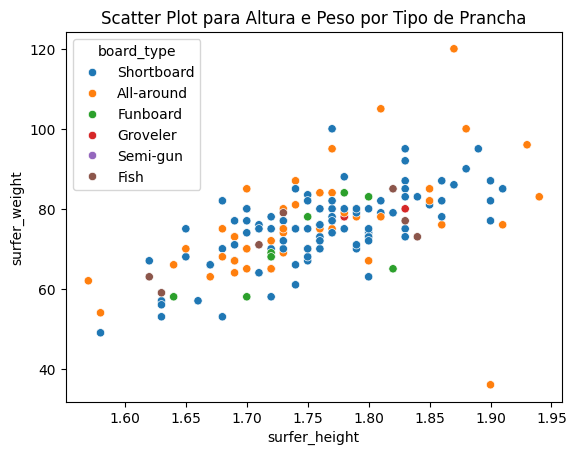

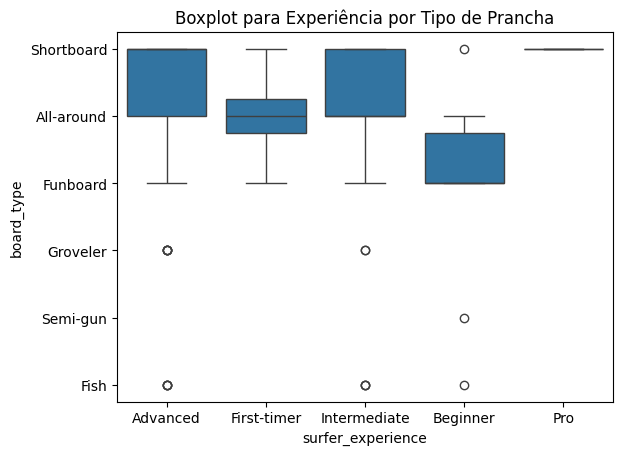

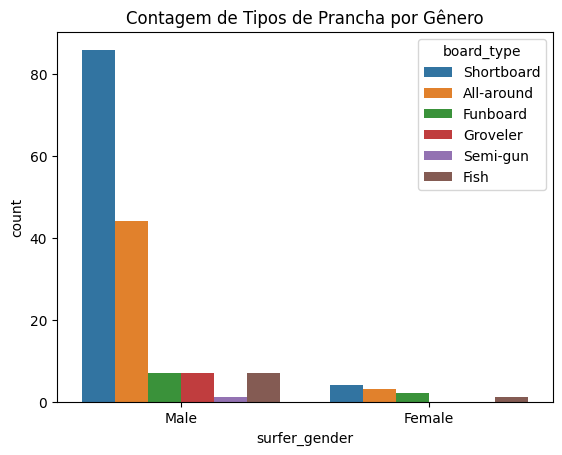

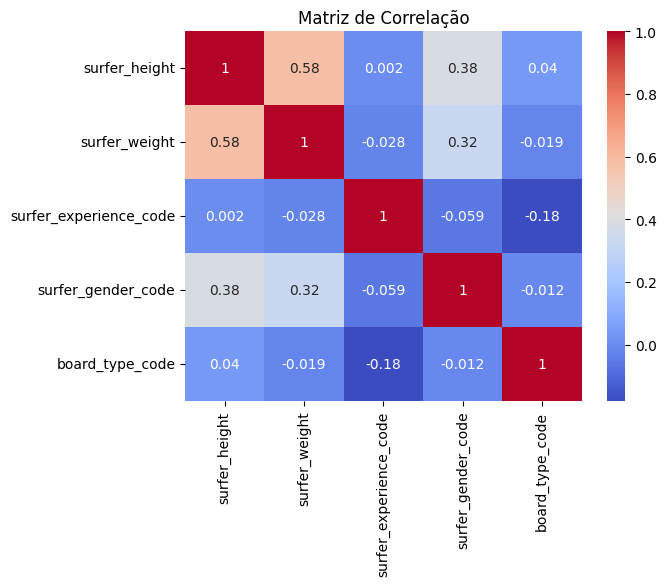

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\luizc\\OneDrive\\Área de Trabalho\\Facul_Eng\\df_surf.csv')



# Análise exploratória

sns.scatterplot(data=df, x='surfer_height', y='surfer_weight', hue='board_type')
plt.title('Scatter Plot para Altura e Peso por Tipo de Prancha')
plt.show()


sns.boxplot(data=df, x='surfer_experience', y='board_type')
plt.title('Boxplot para Experiência por Tipo de Prancha')
plt.show()


sns.countplot(data=df, x='surfer_gender', hue='board_type')
plt.title('Contagem de Tipos de Prancha por Gênero')
plt.show()

# heatmap para correlação entre as variáveis numéricas
# convertendo variáveis categóricas em códigos numéricos
df['surfer_experience_code'] = df['surfer_experience'].astype('category').cat.codes
df['board_type_code'] = df['board_type'].astype('category').cat.codes
df['surfer_gender_code'] = df['surfer_gender'].astype('category').cat.codes

#selecionando colunas para geração da matriz de correlação
selected_columns = df[['surfer_height', 'surfer_weight', 'surfer_experience_code', 'surfer_gender_code', 'board_type_code']]
correlation_matrix = selected_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
